In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
pd.options.display.float_format = "{:,.2f}".format
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick

In [2]:
# imdb_title_basics cleaning
imdb_title_basics = pd.read_csv('./data/imdb.title.basics.csv')
imdb_title_basics.drop(columns = {'runtime_minutes'}, inplace = True)
imdb_title_basics = imdb_title_basics.loc[imdb_title_basics.genres.isna() == False] # This line removes rows where genre is missing
imdb_title_basics.rename({'tconst': 'movie_id'}, axis = 1, inplace=True)

In [3]:
# column cleaner function
def clean_columns(series):
    return series.apply(lambda x: float(x.replace('$', '').replace(',', '')))

In [4]:
tn_movie_budgets = pd.read_csv('./data/tn.movie_budgets.csv')
tn_movie_budgets = tn_movie_budgets.drop(columns={'id'})
tn_movie_budgets.rename({'movie': 'primary_title'}, axis = 1, inplace=True)

### cleaning columns of $ and , and makes them floats
tn_movie_budgets.production_budget = clean_columns(tn_movie_budgets.production_budget)
tn_movie_budgets.domestic_gross = clean_columns(tn_movie_budgets.domestic_gross)
tn_movie_budgets.worldwide_gross = clean_columns(tn_movie_budgets.worldwide_gross)
###
tn_movie_budgets['budget_gross_ratio'] = tn_movie_budgets.worldwide_gross / tn_movie_budgets.production_budget
tn_movie_budgets = tn_movie_budgets.loc[tn_movie_budgets.domestic_gross > 0] # Drops rows with missing gross data

In [5]:
merge = tn_movie_budgets.merge(imdb_title_basics, on= 'primary_title')
merge.drop_duplicates(subset='movie_id', keep='first', inplace=True)
merge = merge.drop(merge[merge.primary_title.duplicated()&merge.production_budget.duplicated()].index)
merge.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,budget_gross_ratio,movie_id,original_title,start_year,genres
0,"Dec 18, 2009",Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",6.53,tt1775309,Abatâ,2011,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2.55,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",0.43,tt6565702,Dark Phoenix,2019,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",4.24,tt2395427,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi"
4,"Apr 27, 2018",Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,134,200.00",6.83,tt4154756,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"


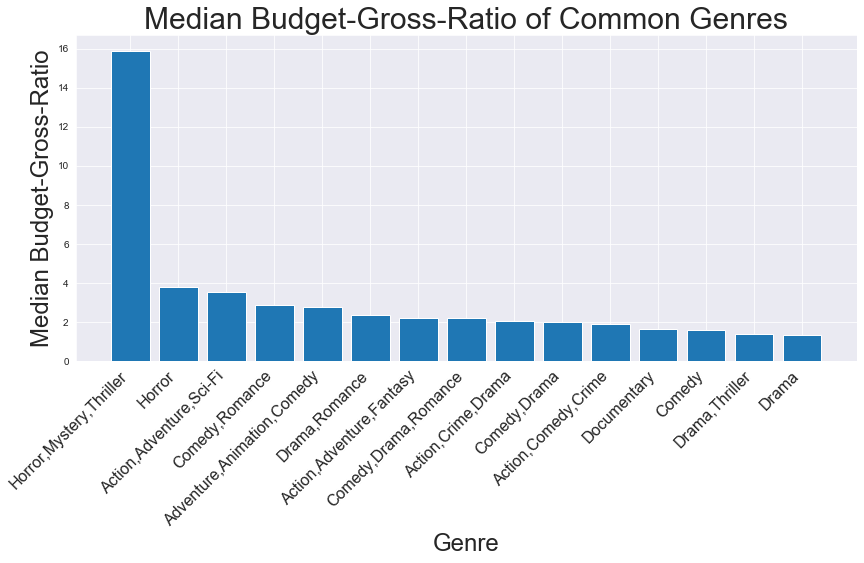

In [6]:
bgrmedian = merge.groupby('genres').budget_gross_ratio.median()
indices = merge.genres.value_counts()[:15].index
data = bgrmedian[indices].sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (14,6))
ax.set_title('Median Budget-Gross-Ratio of Common Genres', fontsize=30)
ax.set_ylabel('Median Budget-Gross-Ratio', fontsize = 24)
ax.set_xlabel('Genre', fontsize = 24)
ax.set_xticklabels(data.index, rotation=45, horizontalalignment='right', fontsize=16)
ax.bar(data.index, data);

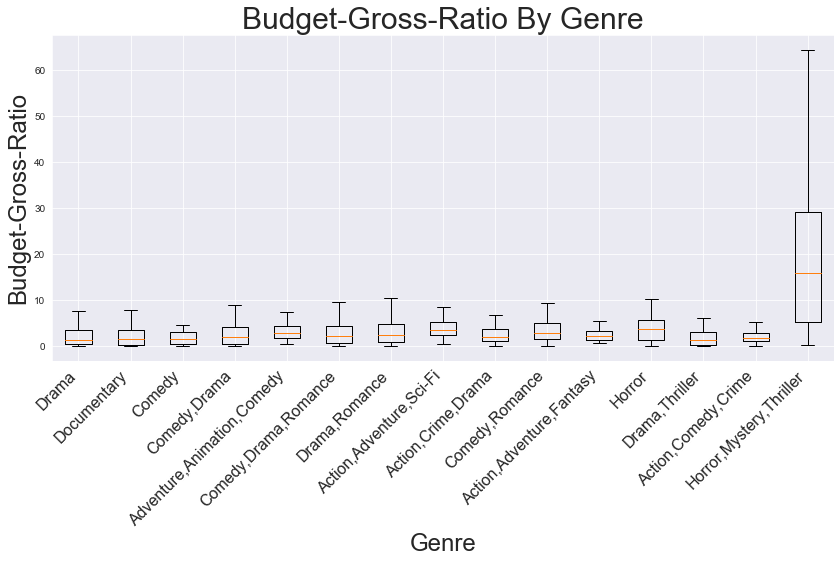

In [7]:
fig, ax = plt.subplots(figsize = (14,6))
data = [merge.loc[merge.genres==x].budget_gross_ratio for x in indices]
ax.set_title('Budget-Gross-Ratio By Genre', fontsize=30)
ax.set_ylabel('Budget-Gross-Ratio', fontsize = 24)
ax.set_xlabel('Genre', fontsize = 24)
ax.set_xticklabels(indices, rotation=45, horizontalalignment='right', fontsize=16)
ax.boxplot(data, showfliers=False);

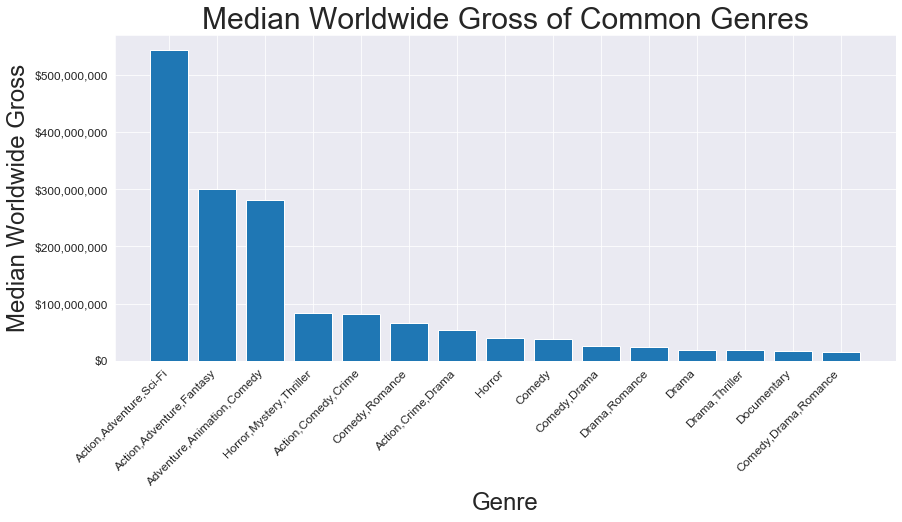

In [8]:
grossmedian = merge.groupby('genres').worldwide_gross.median()
indices = merge.genres.value_counts()[:15].index
data = grossmedian[indices].sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (14,6))
ax.set_title('Median Worldwide Gross of Common Genres', fontsize=30)
ax.set_ylabel('Median Worldwide Gross', fontsize = 24)
ax.set_xlabel('Genre', fontsize = 24)
ax.set_xticklabels(data.index, rotation=45, horizontalalignment='right', fontsize=16)

### Dollar ticks
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.tick_params(labelsize='large')
###

ax.bar(data.index, data);

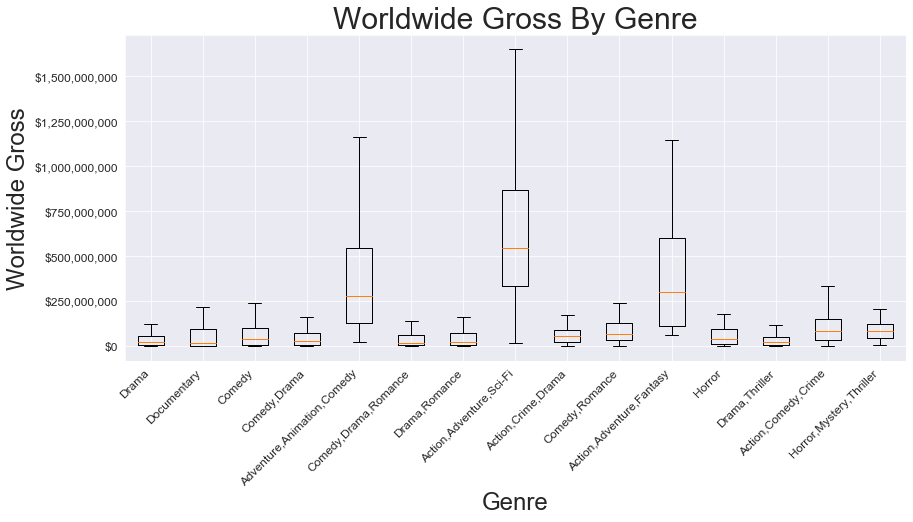

In [9]:
fig, ax = plt.subplots(figsize = (14,6))
data = [merge.loc[merge.genres==x].worldwide_gross for x in indices]
ax.set_title('Worldwide Gross By Genre', fontsize=30)
ax.set_ylabel('Worldwide Gross', fontsize = 24)
ax.set_xlabel('Genre', fontsize = 24)
ax.set_xticklabels(indices, rotation=45, horizontalalignment='right', fontsize=16)

### Dollar ticks
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.tick_params(labelsize='large')
###

ax.boxplot(data, showfliers=False);